In [1]:
#This code was developed by Taren Patel


# Import required libraries
from qiskit import *
import pandas as pd
from qiskit import transpile
import random
import csv
import numpy as np
from qiskit.providers.aer import AerSimulator
import time
import pathlib
from IPython.display import clear_output
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector
from qiskit_ibm_provider import IBMProvider
from qiskit import IBMQ, Aer
from qiskit.providers.aer.noise import NoiseModel
from qiskit_ibm_provider import IBMProvider

# Create an instance of IBMProvider using a specific instance name
provider = IBMProvider(instance='****************')

# Get the backend named 'ibm_perth' from the provider
backend = provider.get_backend('ibm_perth')

# Define a list of fields
fields = ["ry", "rz", "0CountsSim", "1CountsSim", "0CountsReal", "1CountsReal", "StateVector"]


## Collect Data From Quantum Computer on Different Qubit Measurements

In [ ]:
# Import required libraries
from time import sleep
import numpy as np

# Define constants
pi = np.pi
shots = 4000

# Iterate over a range (2 to 2, exclusive)
for j in range(2, 3):
    counter = 0
    num = 0
    sub_division = 5
    final = []
    qubit = j

    # Loop indefinitely until a break condition is met
    while True:
        listToAppend = []
        qc = QuantumCircuit(7, 1)

        # Check the value of the counter variable
        if counter == 0:
            counter += 1
            listToAppend.append("0")
            listToAppend.append("0")
        else:
            # Apply quantum gates to the circuit
            qc.ry((counter*pi)/sub_division, qubit)
            qc.rz((num*pi)/sub_division, qubit)
            listToAppend.append((counter*pi)/sub_division)
            listToAppend.append((num*pi)/sub_division)
            num += 1

        # Get the state vector of the circuit
        sv = Statevector.from_instruction(qc).data

        # Measure the qubit and store the measurement result
        qc.measure(qubit, 0)
        tqc = transpile(qc, backend, optimization_level=0)

        # Simulate the circuit using the qasm_simulator backend
        job = execute(tqc, Aer.get_backend('qasm_simulator'), shots=shots)
        result = job.result()
        sim = result.get_counts()
        print(sim)
        resultSimListK = list(sim.keys())
        resultSimListV = list(sim.values())

        # Append measurement results to the listToAppend
        if int(resultSimListK[0]) == 0:
            if len(resultSimListK) == 2:
                listToAppend.append(resultSimListV[0])
                listToAppend.append(resultSimListV[1])
            else:
                listToAppend.append(resultSimListV[0])
                listToAppend.append(0)
        else:
            if len(resultSimListK) == 2:
                listToAppend.append(resultSimListV[1])
                listToAppend.append(resultSimListV[0])
            else:
                listToAppend.append(0)
                listToAppend.append(resultSimListV[0])

        # Simulate the circuit using the backend (IBM Quantum device)
        job = execute(tqc, backend=backend, shots=shots)
        job_monitor(job)
        result = job.result()
        real = result.get_counts()
        print(real)
        resultRealListK = list(real.keys())
        resultRealListV = list(real.values())

        # Append measurement results to the listToAppend
        if int(resultRealListK[0]) == 0:
            if len(resultRealListK) == 2:
                listToAppend.append(resultRealListV[0])
                listToAppend.append(resultRealListV[1])
            else:
                listToAppend.append(resultRealListV[0])
                listToAppend.append(0)
        else:
            if len(resultRealListK) == 2:
                listToAppend.append(resultRealListV[1])
                listToAppend.append(resultRealListV[0])
            else:
                listToAppend.append(0)
                listToAppend.append(resultRealListV[0])

        # Append the state vector to the listToAppend
        listToAppend.append


{'0': 4000}


C:\Users\taren\anaconda3\lib\site-packages\qiskit_ibm_provider\ibm_backend.py:445: UserWarning: The backend ibm_perth is currently paused.
  warnings.warn(f"The backend {self.name} is currently paused.")


Job Status: job is queued (None)

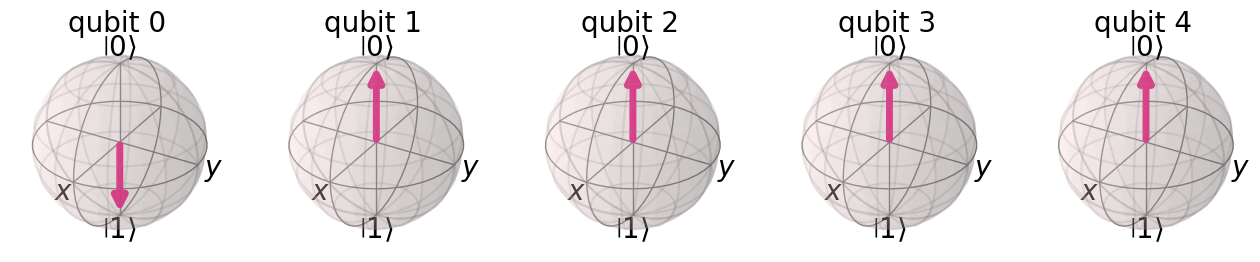

In [218]:
plot_state_qsphere(sv)
plot_bloch_multivector(sv)

In [132]:
# Import pandas library
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("qubit7Perth.csv")

# Extract column 'ry' as a list
ry = df['ry'].tolist()

# Extract column 'rz' as a list
rz = df['rz'].tolist()

# Extract column '0CountsSim' as a list
CountsSim0 = df['0CountsSim'].tolist()

# Extract column '1CountsSim' as a list
CountsSim1 = df['1CountsSim'].tolist()

# Extract column '0CountsReal' as a list
CountsReal0 = df['0CountsReal'].tolist()

# Extract column '1CountsReal' as a list
CountsReal1 = df['1CountsReal'].tolist()


FileNotFoundError: [Errno 2] No such file or directory: 'qubit7Perth.csv'

In [131]:
# Import pyvista library
import pyvista as pv
import numpy as np

# Define a function to find the index of the closest vertex to a given point
def find_closest_vertex(mesh, x, y, z):
    points = np.array(mesh.points)
    distances = np.sqrt((points[:, 0] - x) ** 2 + (points[:, 1] - y) ** 2 + (points[:, 2] - z) ** 2)
    closest_index = np.argmin(distances)
    return closest_index

# Define a function to increase the radius of a specific vertex in the mesh
def increase_vertex_radius(mesh, index, amount):
    points = np.array(mesh.points)
    x, y, z = points[index]
    dist = np.sqrt(x * x + y * y + z * z)
    if dist == 0:
        return
    scale = 1 + amount / dist
    points[index] = (x * scale, y * scale, z * scale)
    mesh.points = points

# Define mesh parameters
radius = 1.0
theta_res = 16
phi_res = 16

# Create a sphere mesh using the defined parameters
mesh = pv.Sphere(radius=radius, theta_resolution=theta_res, phi_resolution=phi_res)

# Loop over the range of angles
for i in range(len(ry)):
    # Extract rotation angles and error values from the provided lists
    y_rotation = ry[i]
    z_rotation = rz[i]

    if CountsSim0[i] > CountsSim1[i]:
        error = 10 * (CountsReal0[i] - CountsSim0[i]) / CountsSim0[i]
    else:
        error = 10 * (CountsReal1[i] - CountsSim1[i]) / CountsSim1[i]

    # Calculate the coordinates of the point based on the rotation angles
    x_coord = radius * np.cos(z_rotation) * np.sin(y_rotation)
    y_coord = radius * np.sin(z_rotation) * np.sin(y_rotation)
    z_coord = radius * np.cos(y_rotation)

    # Find the closest vertex in the mesh to the calculated coordinates and increase its radius
    closest_index = find_closest_vertex(mesh, x_coord, y_coord, z_coord)
    increase_vertex_radius(mesh, closest_index, error)

    # Create a plotter and add the mesh to it
    p = pv.Plotter()
    p.add_mesh(mesh, color='white')

# Display the plot
p.show()

# Save the modified mesh as an STL file
filename = 'qubit6Perth.stl'
mesh.save(filename)


Widget(value="<iframe src='http://localhost:58932/index.html?ui=P_0x282378a14b0_1602&reconnect=auto' style='wi…